<h2>Heterodyne Phase Camera Simulator(hpc_sim)</h2>
This notebook will run you through the basic of using the hpc sim package. This package aims to provide tools for creating realitic intensity images for testing the performance of phase retrieval algorithms. So let's begin by setting up our environment.

In [51]:
import hpc 
import numpy as np
import matplotlib.pyplot as plt
import pykat as pk

# These are just personal preferences of mine and are not necessary for you.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

<h3> Initialize a CMOS sensor </h3>
Within the package a CMOS object is defined with some useful functions for adding realism to an image that is passed into it. So most simulations of this nature will start with the definition of a CMOS_sensor object. In this object you can define the pixel pitch, sensor array resolution, quantum efficieny, exposure time, and pixel well depth. These have been set to the values of the Blackfly S by default, but can of course can be changed.

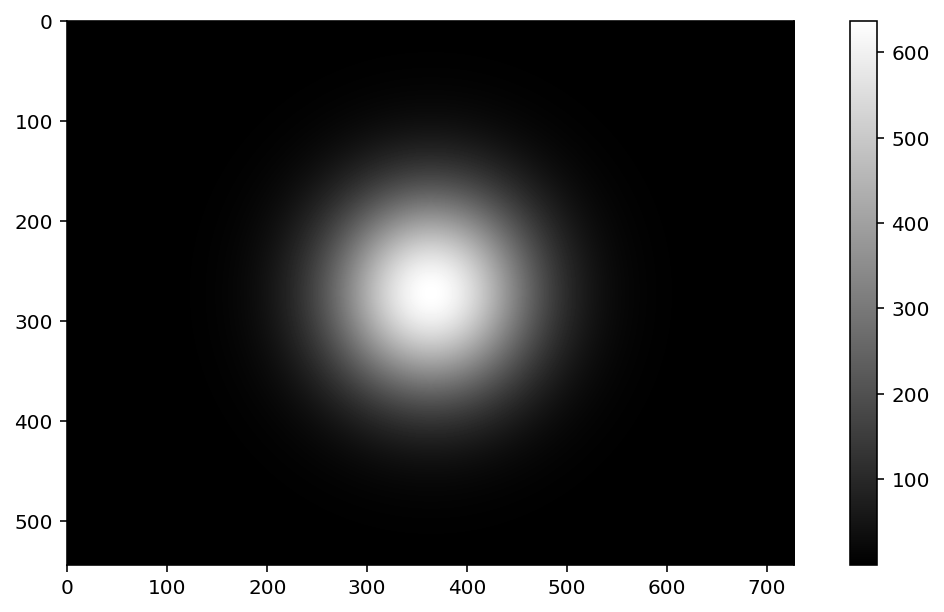

In [52]:
sensor = hpc.CMOS_sensor(pixel_pitch=6.9e-6, x_resolution=728, y_resolution=544, exposure_time=4e-6, quantum_eff=0.03, pixel_well_depth=22187) 
# sensor = hpc.CMOS_sensor() will do the same thing, however just to show you how you can set different values upon initalization

# the sensor will generate arrays with the spatial location of each pixel. This is used when trying to produce intensity images,
# as you need these to define a gaussian beam.

x_array = sensor.x_array
y_array = sensor.y_array

# Using these arrays let us generate a basic intensity image of a gaussian beam. Within the package is a gauss_amp function.
# This will produce an image of the right size representative of the amplitude profile of a gaussian beam.

amplitude_map = hpc.gauss_amp(x_array, y_array, w0=1000e-6, z=0, x_offset=0, y_offset=0)
intensity_map = np.real(1e-3*amplitude_map*np.conj(amplitude_map))
hpc.plot(intensity_map, cmap='gray')

That's a pretty good looking beam! Now let's make it a little more real. Within the sensor we can convert an intensity image into a photon count, add shot noise, convert that to an electron count, add camera noise, and then digitize the image.

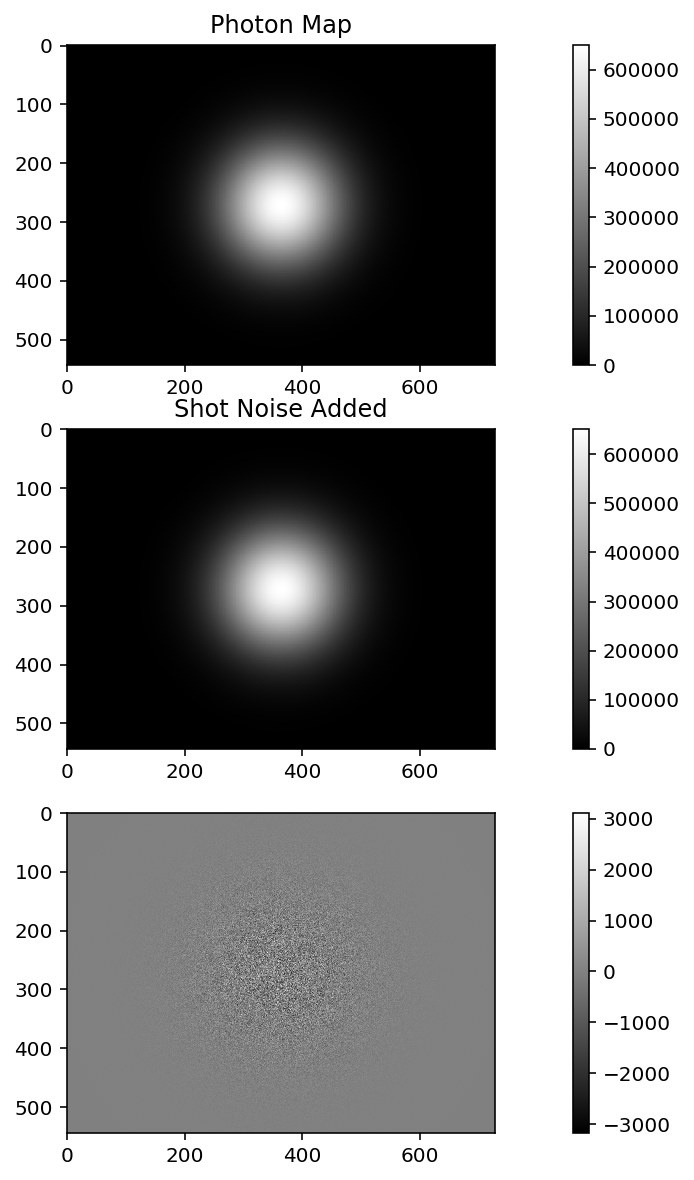

In [58]:
rcParams['figure.figsize'] = 14, 10

# First let's get our photons
photon_map = sensor.convert_to_photons(intensity_map)

# and now let's add some shot noise
noisey_photon_map = sensor.add_shot_noise(photon_map)

plt.subplot(3,1,1)
hpc.plot(photon_map)
plt.title('Photon Map')

plt.subplot(3,1,2)
hpc.plot(noisey_photon_map)
plt.title('Shot Noise Added')


#Doesn't really look like anything has happened but if we subtract the two it becomes apparent
plt.subplot(3,1,3)
hpc.plot(photon_map - noisey_photon_map)

Now let us convert this to electrons, add read noise, and digitize this image.

Text(0.5, 1.0, 'Digitized image')

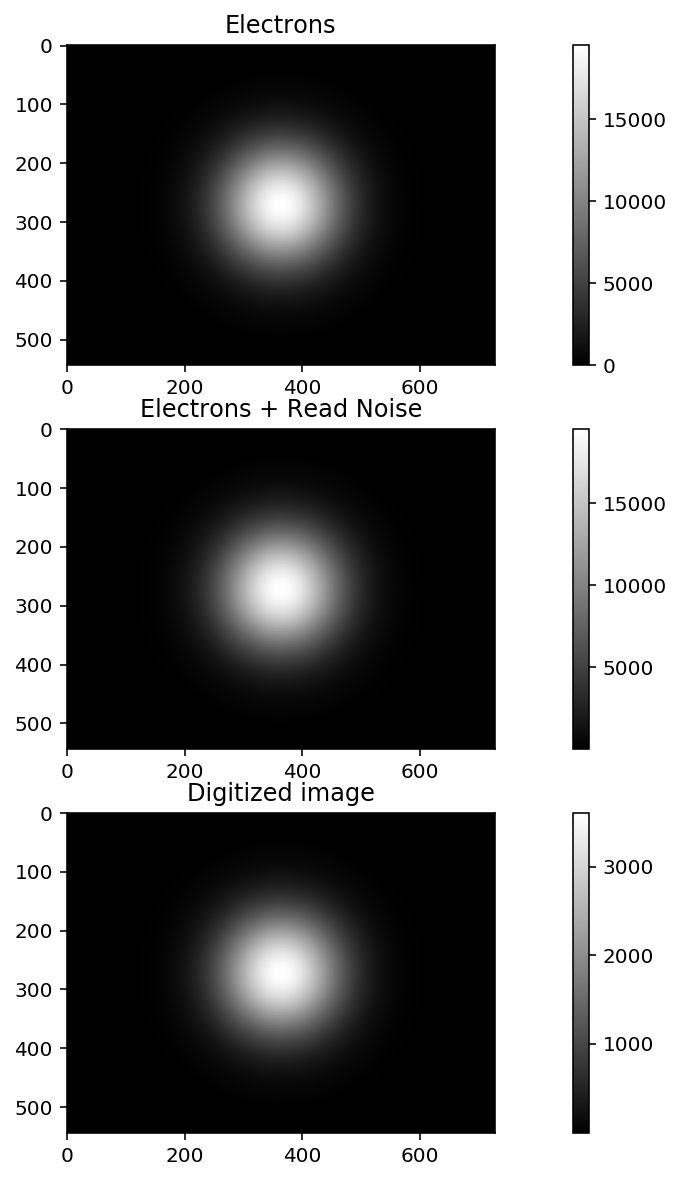

In [55]:
electron_map = sensor.convert_to_electrons(noisey_photon_map, convert_to_photons=False)
noisey_electron_map = sensor.add_read_noise(electron_map, mean=3.71)
digitized_image = sensor.digitize(noisey_electron_map, bitdepth=12)

plt.subplot(3,1,1)
hpc.plot(electron_map)
plt.title('Electrons')

plt.subplot(3,1,2)
hpc.plot(noisey_electron_map)
plt.title('Electrons + Read Noise')

#Doesn't really look like anything has happened but if we subtract the two it becomes apparent
plt.subplot(3,1,3)
hpc.plot(digitized_image)
plt.title('Digitized image')

Now that we've gone through all this, I should say that all these steps can be done in one function call.

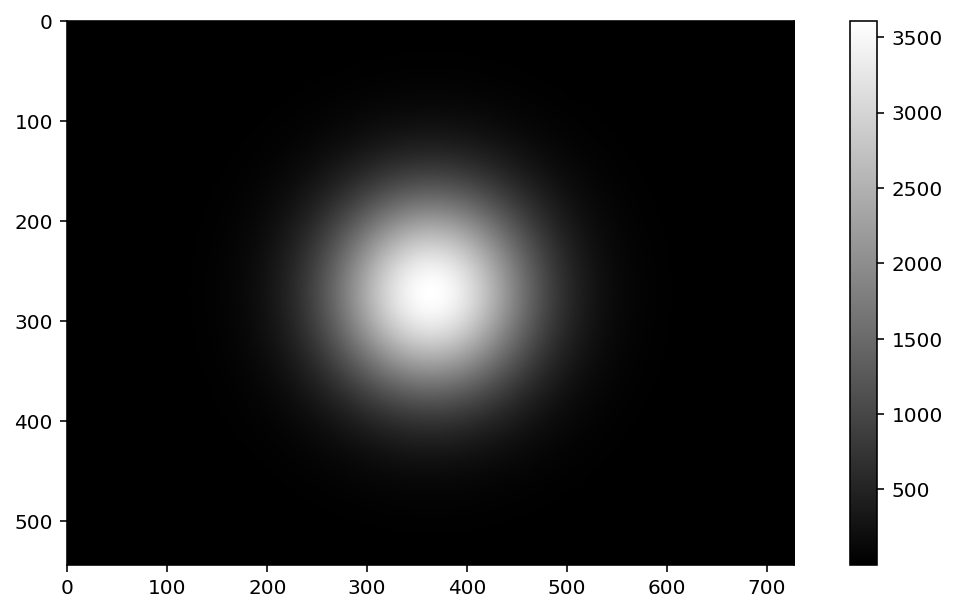

In [57]:
rcParams['figure.figsize'] = 10, 5
image = sensor.capture(intensity_map, 12)
hpc.plot(image)